<a href="https://colab.research.google.com/github/USERSAKSHAMJAIN/Customer-Segmentation-Analysis/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation Analysis

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='drive/My Drive/Dataset'

In [4]:
a1=pd.read_csv(path+"/MallCustomers.csv")
a1.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Extracting Independent Variable only and all column is called Features.
# Here we don't need any dependent variable for data pre-processing step as it and we have no idea about what to determine
# This is Unsupervised learning and hice we will do clustering
# So we will just need a matrix of features or Independent variables only.
# We are extracting 3rd and 4th feature

x = a1.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

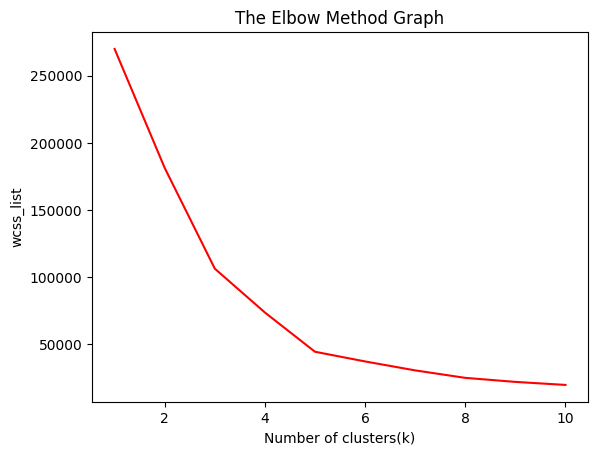

In [6]:
# Finding the optimal number of clusters using elbow method (afterwards no turn is there)
# we import the KMean class of sklearn.cluster library to form the clusters

from sklearn.cluster import KMeans

# Next we have created the xcc_list variable to initialize an empty list,
# which is used to contain the values of wcc computed for different values of k ranging from 1 to 10
# The Graph is called Silhoutte graph

wcss_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list, color = 'r')
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters(k)")
plt.ylabel('wcss_list')
plt.show()

In [7]:
!pip install kneed

In [8]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,11), wcss_list, curve = 'convex', direction = 'decreasing')
k1.elbow

5

Since the elbow point is at 5. So the number of clusters here will be 5

In [9]:
kmeans =KMeans(n_clusters = 5,init='k-means++',random_state =1)
y_pred =kmeans.fit_predict(x)

In [10]:
y_pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

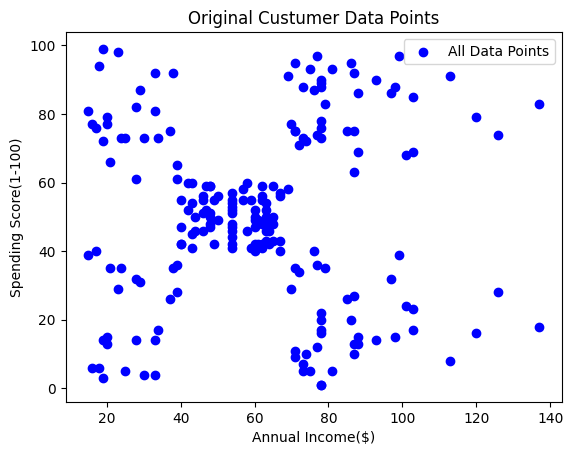

In [11]:
#  Visualizing Original Data Points without clustering
plt.scatter(x[:,0],x[:,1],c='blue',label='All Data Points')
plt.title('Original Custumer Data Points')
plt.xlabel('Annual Income($)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

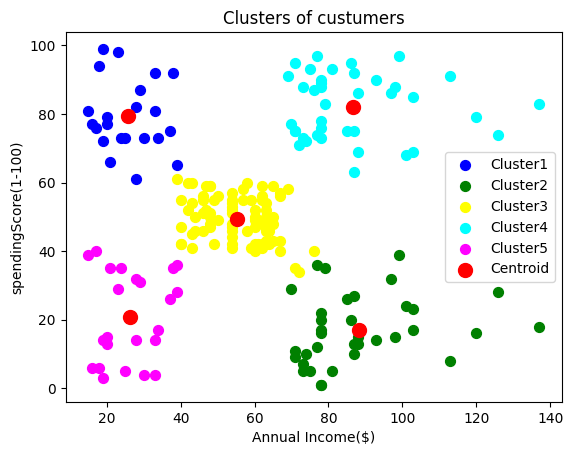

In [12]:
#for first cluster
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=50,c='blue',label='Cluster1')
#for second cluster
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=50,c='green',label='Cluster2')
#for third cluster
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=50,c='yellow',label='Cluster3')
#for fourth cluster
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=50,c='cyan',label='Cluster4')
#for fifth cluster
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],s=50,c='magenta',label='Cluster5')

# to plot the centroid this time we're going to use the kmeans.cluster_centres_
# attribute that return the coordinates of the centroid.

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label="Centroid")
plt.title('Clusters of custumers')
plt.xlabel('Annual Income($)')
plt.ylabel('spendingScore(1-100)')
plt.legend()
plt.show()

In [13]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


In [14]:
labels = kmeans.labels_
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)